# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 4: ML Applications - Vehicle Motion State Classification*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Seyram | Atsu Quist |SeyramAtsuQuist,28/11/24 | 5 | 25 |
| Member 2: | Akosua | Gyimah | AkosuaGyimah,24/11/24 | 5 | 25 |
| Member 3: | Joseph | Mills | JosephMills,28/11/24 | 5 | 25 |
| Member 4: | Gideon | Asamoah | GideonAsamoah,28/11/24 | 5 | 25 |


---

## Section 1 - Motion Classification Using *All Features* Derived From Inertial Sensor Data (33 Marks)

---

### 1.1 Assignment datasets import (6 Marks)

In [2]:
# some library imports
import pandas as pd

First load the following datasets into dataframes.
* *UrbanNav-HK_Whampoa-20210521_sensors.csv* to dataframe variable named *cv_set*. This dataset is to be used for model training and hyper parameter tuning.
* *UrbanNav-HK_TST-20210517_sensors.csv* to dataframe variable named *test_set1*. This is first independent test dataset.
* *2020-03-14-16-45-35.csv* to dataframe variable named *test_set2*. This is the second independent test dataset.

In [3]:
# (2 marks)
# TODO: Load cross validation/training dataset (UrbanNav-HK_Whampoa-20210521_sensors.csv) to 'cv_set' dataframe

# uncomment and compelete below
cv_set = pd.read_csv('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment4/UrbanNav-HK_Whampoa-20210521_sensors.csv')

# TODO: Load UrbanNav-HK_TST-20210517_sensors.csv to 'test_set1' dataframe
test_set1 = pd.read_csv('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment4/UrbanNav-HK_TST-20210517_sensors.csv')

# TODO: Load 2020-03-14-16-45-35.csv to 'test_set2' dataframe
test_set2 = pd.read_csv('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment4/2020-03-14-16-45-35.csv')

For the *cv_set*, look at the dataframe head and info, and print the list of all columns. The *test_set1* and *test_set2* have the same schema as *cv_set*, however, have different number of rows (samples).

In [4]:
# TODO: Display first two rows of cv_set
# (1 mark)

#Answer
print("The first two rows of cv_set is:")
print(cv_set.head(2))

The first two rows of cv_set is:
     ax_sum    ay_sum    az_sum    gx_sum    gy_sum    gz_sum     a_sum  \
0 -0.003929 -0.093081  9.789349 -0.002649  0.001406 -0.001391  9.797418   
1 -0.000966 -0.092417  9.789095 -0.001806  0.000103 -0.001943  9.798815   

      g_sum        ax_var        ay_var  ...     g_min    ax_max    ay_max  \
0  0.022554  8.046094e-07  1.319665e-07  ...  0.000003  0.001496  0.000544   
1  0.021731  1.032619e-06  1.073067e-07  ...  0.000006  0.001865  0.000615   

     az_max    gx_max    gy_max    gz_max     a_max     g_max  motion_state  
0  0.024992  0.000110  0.000075  0.000078  0.024997  0.000187          rest  
1  0.024828  0.000124  0.000098  0.000090  0.024829  0.000144          rest  

[2 rows x 33 columns]


In [5]:
# TODO: Load the info method of cv_set
# (1 mark)

#Answer
print("Info method of 'cv_set':")
print(cv_set.info())

Info method of 'cv_set':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ax_sum        1534 non-null   float64
 1   ay_sum        1534 non-null   float64
 2   az_sum        1534 non-null   float64
 3   gx_sum        1534 non-null   float64
 4   gy_sum        1534 non-null   float64
 5   gz_sum        1534 non-null   float64
 6   a_sum         1534 non-null   float64
 7   g_sum         1534 non-null   float64
 8   ax_var        1534 non-null   float64
 9   ay_var        1534 non-null   float64
 10  az_var        1534 non-null   float64
 11  gx_var        1534 non-null   float64
 12  gy_var        1534 non-null   float64
 13  gz_var        1534 non-null   float64
 14  a_var         1534 non-null   float64
 15  g_var         1534 non-null   float64
 16  ax_min        1534 non-null   float64
 17  ay_min        1534 non-null   float64
 18  az_

In [6]:
# TODO: Display the number of rows and columns  of all three datasets
# (1 mark)

#Answer
print(f"'cv_set' has {cv_set.shape[0]} rows and {cv_set.shape[1]} columns")
print(f"'test_set1' has {test_set1.shape[0]} rows and {test_set1.shape[1]} columns")
print(f"'test_set2' has {test_set2.shape[0]} rows and {test_set2.shape[1]} columns")

'cv_set' has 1534 rows and 33 columns
'test_set1' has 783 rows and 33 columns
'test_set2' has 297 rows and 33 columns


In [7]:
# TODO: Display all columns in cv_set
# (1 mark)

#Answer
print("All columns in 'cv_set' are as follows:")
print(cv_set.columns.tolist())

All columns in 'cv_set' are as follows:
['ax_sum', 'ay_sum', 'az_sum', 'gx_sum', 'gy_sum', 'gz_sum', 'a_sum', 'g_sum', 'ax_var', 'ay_var', 'az_var', 'gx_var', 'gy_var', 'gz_var', 'a_var', 'g_var', 'ax_min', 'ay_min', 'az_min', 'gx_min', 'gy_min', 'gz_min', 'a_min', 'g_min', 'ax_max', 'ay_max', 'az_max', 'gx_max', 'gy_max', 'gz_max', 'a_max', 'g_max', 'motion_state']


In all three dataframes, target vector is stored in the *motion_state* column. All other columns are features.

___

### 1.2 - Grid Search with Cross Validation (18 Marks)

___

#### 1.2.1 - Extract all features and target from cv_set

___

From the *cv_set*, load the target vector stored in the *motion_state* column into a new variable *y*

In [8]:
# TODO - Load target vector into y
# (1 mark)

#Answer
y = cv_set['motion_state']
print(y.head())

0        rest
1        rest
2    straight
3        turn
4        turn
Name: motion_state, dtype: object


From *cv_set*, load all features, that is all columns except for the target vector, in a new dataframe variable *X*

In [9]:
# TODO - Load all features from cv_set to X
# (2 marks)

#Answer
X = cv_set.drop(columns=['motion_state'])
X.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391,9.797418,0.022554,8.046094e-07,1.319665e-07,...,0.023871,0.000003,0.001496,0.000544,0.024992,0.000110,0.000075,0.000078,0.024997,0.000187
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943,9.798815,0.021731,1.032619e-06,1.073067e-07,...,0.024153,0.000006,0.001865,0.000615,0.024828,0.000124,0.000098,0.000090,0.024829,0.000144


___

#### 1.2.2 - Configure and Perform Grid Search with Cross-Validation

___

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import GridSearchCV

The dataset *(X, y)*, must be split into training/validation *(X_train, y_train)* and testing *(X_test, y_test)* sets. Use the `train_test_split` function from sklearn to create the split, where  **30%** of data is used for testing. Set the `random_state=42`, and `stratify=y`.  

In [11]:
# TODO - Perform test/train split
# (1 mark)

#Answer
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Initialize a `Pipeline`, consisting of a *scaler* and a *classifer*, set the default values to *StandardScaler()*, and *SVC()*, respectively.

In [12]:
# TODO - Initialize Pipeline into variable pipe
# (2 marks)

# Answer
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC())])

Define the grid search configuration (*param_grid*) for training and hyper parameter tuning of the *support vector classifier*. Tune, the hyper-parameter *C*, over the interval `C=[0.01, 0.1, 1 ,10,100]`, *gamma*, over the interval `gamma=[0.001, 0.01, 0.1,1]`, and use the *radial basis function* as the kernel. For the *scaler* parameter, test with the `StandardScaler`, `RobustScaler`, and `None` options.

In [13]:
# TODO - Setup grid set
# (4 marks)

# Answer
param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), None],
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__gamma': [0.001, 0.01, 0.1, 1],
    'classifier__kernel': ['rbf']}

In [14]:
# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'classifier__kernel': ['rbf'],
                         'scaler': [StandardScaler(), RobustScaler(), None]},
             return_train_score=True, scoring='accuracy')

___

#### 1.2.3 - Visualize Grid Search Results

___

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [15]:
# TODO: Print the results from the grid search
# (2 marks)

#Answer
print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(max(grid.cv_results_['mean_train_score'])))
print("Best cross-validation validation score: {:.2f}".format(grid.best_score_))

#evalution of test set (PS: to group members, added code myself)
from sklearn.metrics import accuracy_score
test_score = accuracy_score(y_test, grid.best_estimator_.predict(X_test))

print("Test-set score: {:.2f}".format(test_score)) #(PS: to group members, part of original)

Best params:
{'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf', 'scaler': RobustScaler()}

Best cross-validation train score: 1.00
Best cross-validation validation score: 0.95
Test-set score: 0.96


Display the confusion matrix and print the classification report for the trained model. Use the *(X_test, y_test)* dataset. **Hint** - You can use your code from assignment 3.


Classification Report:
              precision    recall  f1-score   support

        rest       0.94      0.99      0.96       155
    straight       0.97      0.93      0.95       207
        turn       0.95      0.97      0.96        99

    accuracy                           0.96       461
   macro avg       0.95      0.96      0.96       461
weighted avg       0.96      0.96      0.96       461



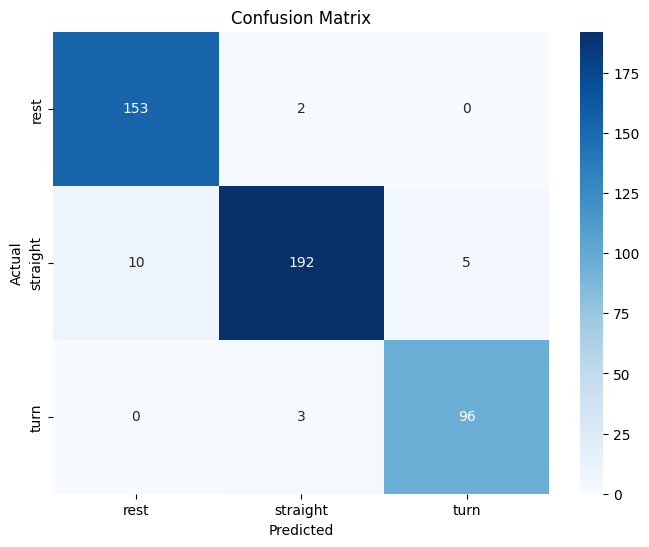

In [16]:
# TODO - Display confusion matrix and print classification report for (X_test, y_test)
# (2 marks)

#Answer
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = grid.best_estimator_.predict(X_test) # Generating predictions for the test set

conf_matrix = confusion_matrix(y_test, y_pred) # Computing the confusion matrix

#Printing the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#Visualization of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

___

#### 1.2.4 - Questions

1. Comment on the fit of the model to the dataset? (2 marks)
2. In the grid search, are the intervals used for *C* and *gamma* hyperparameters suitable? Why or why not? (2 marks)

#### 1.2.4 - Answers
1. The model is a good fit for the data. This is because, there is an accuracy of 96%, as seen in the classification report. The precision, recall, and F1-scores are all high for each motion state.
The model perfectly identifies when the vehicle is at rest and can strong ability to detect turning motions accurately.


2.  The intervals chosen for the hyperparameters C and gamma seem suitable for this problem.
The best result for C is 100, meaning a larger penalty on misclassification improves performance in this case.The optimal gamma (0.01) balances smooth decision boundaries with avoiding overfitting.

___

### 1.3 - Model Evaluation on Test Datasets 1 and 2 (9 Marks)

#### 1.3.1 - Extract all features and targets from test datasets

Next, the model trained in 1.2 will be tested on independent datasets, that is *test_set1* and *test_set2*. <br>
The test_sets must be seperated into features (Xs) and targets (ys).

In [17]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1
# (1 marks)

# Answer
y1 = test_set1['motion_state']
X1 = test_set1.drop(columns=['motion_state'])
X1.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,0.264465,0.089904,9.786930,-0.002305,0.000218,-0.001143,9.801661,0.025634,0.000001,7.749919e-08,...,0.024056,0.000003,0.002506,0.000845,0.024884,0.000155,0.000078,0.000069,0.024886,0.000170
1,0.264300,0.088882,9.788127,-0.001865,-0.000523,-0.001999,9.802481,0.025218,0.000001,9.243000e-08,...,0.024084,0.000007,0.002427,0.000949,0.024881,0.000201,0.000095,0.000076,0.024883,0.000201


In [18]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2

#Answer
y2 = test_set2['motion_state']
X2 = test_set2.drop(columns=['motion_state'])
X2.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.046400,0.305907,9.791451,-0.002184,0.001311,-0.001901,9.800683,0.012437,0.000002,3.020959e-07,...,0.048406,0.000007,0.002575,0.002993,0.049701,0.000094,0.000115,0.000080,0.049764,0.000142
1,-0.050073,0.311947,9.785619,-0.003369,0.001898,-0.002051,9.797741,0.013805,0.000003,6.859937e-07,...,0.047696,0.000013,0.003880,0.004106,0.050477,0.000140,0.000140,0.000083,0.050763,0.000151


____

#### 1.3.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [19]:
# TODO - Print test score accuracies for test_set1 and test_set2
# (1 marks)

#ANSWERS
#performing test scre accuracies (PS; group members,added code myself)
test_set1_score = accuracy_score(y1, grid.best_estimator_.predict(X1))
test_set2_score = accuracy_score(y2, grid.best_estimator_.predict(X2))

print("test_set1 score: {:.2f}".format(test_set1_score))
print("test_set2 score: {:.2f}".format(test_set2_score))

test_set1 score: 0.92
test_set2 score: 0.25


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

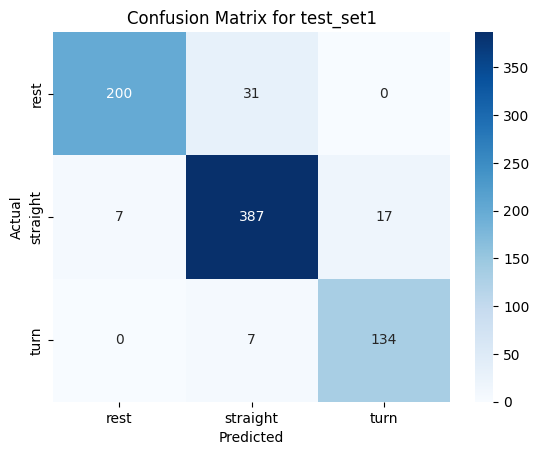

Classification Report for test_set1:
              precision    recall  f1-score   support

        rest       0.97      0.87      0.91       231
    straight       0.91      0.94      0.93       411
        turn       0.89      0.95      0.92       141

    accuracy                           0.92       783
   macro avg       0.92      0.92      0.92       783
weighted avg       0.92      0.92      0.92       783



In [20]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
# (1 marks)

#Answer
y1_pred = grid.best_estimator_.predict(X1)

conf_matrix_1 = confusion_matrix(y1, y1_pred)
sns.heatmap(conf_matrix_1, annot=True, fmt="d", cmap="Blues", xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.title("Confusion Matrix for test_set1")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("Classification Report for test_set1:")
print(classification_report(y1, y1_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

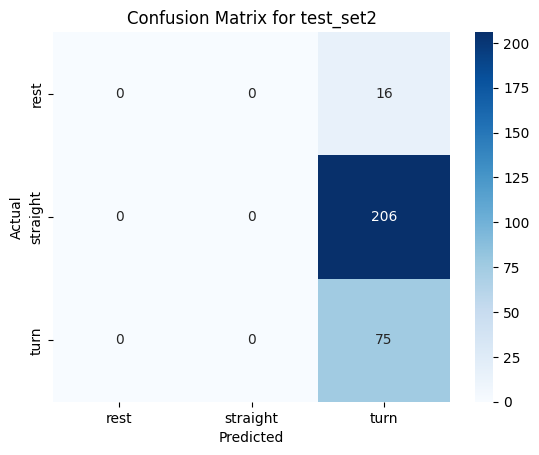

Classification Report for test_set2:
              precision    recall  f1-score   support

        rest       0.00      0.00      0.00        16
    straight       0.00      0.00      0.00       206
        turn       0.25      1.00      0.40        75

    accuracy                           0.25       297
   macro avg       0.08      0.33      0.13       297
weighted avg       0.06      0.25      0.10       297



In [21]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

#Answer
y2_pred = grid.best_estimator_.predict(X2)

conf_matrix_2 = confusion_matrix(y2, y2_pred)
sns.heatmap(conf_matrix_2, annot=True, fmt="d", cmap="Blues", xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.title("Confusion Matrix for test_set2")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("Classification Report for test_set2:")
print(classification_report(y2, y2_pred, zero_division=0))

___

#### 1.3.3 - Questions

**Based on results so far**
1. Comment on the model's performances on the datasets *(X_test, y_test)*, *(X1, y1)*, *(X2, y2)*? A significant difference in performance should be observed, what is this an example of? (3 marks)
1. Provide and explain potential causes for the observed behaviour in performance? (3 marks)

#### 1.3.3 - Answers
1. (X_test, Y_test): The model fits well on this dataset, achieving a high accuracy score of 96%. it is not overfitted or underfitted.

  (X1,Y1): The confusion matrix indicates some misclassification, particularly with the "rest" class. however the accracy score is 92%.

  (X2,Y2): The model performs poorly on this dataset, the accuracy is only 25%. This means the model is unable to generalize to this dataset.

  Observed Difference:
There is a significant drop in performance for (X2,Y2) compared to the other datasets. This is an example of dataset shift/distribution mismatch.


2. *Distribution Mismatch: The features in (X2,Y2) may not follow the same distribution as the training data. Considering the confusion matrix, the model's predictions do not align with actual classes.
*Class Imbalance: The training set may not have adequate representation for certain classes, causing the model to struggle with those in (X2,Y2).



___

## Section 2 - Classification Using *Selected Features* Derived From Inertial Sensor Data (12 Marks)

In this second section, an *SVC* model will be trained and tuned using grid search, however, only *selected features* will be used.

___

### 2.1 Grid Search with Cross Validation (5 Marks)

___

#### 2.1.1 Extract *selected* features and target from *cv_set*

From the *cv_set* dataframe, extract the selected features, listed below, and load them in a new dataframe *X*.
* *ax_var* - variance of accelerometer readings in x
* *ay_var* - variance of accelerometer readings in y
* *az_sum* - sum of accelerometer z readings
* *a_sum* - sum of the norm of accelerometer x, y, z readings
* *gz_var* - variance of gyroscope reading in z

In [22]:
# TODO - Load selected features from cv_set to X
# (1 marks)
X =cv_set[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]
X.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,8.046094e-07,1.319665e-07,9.789349,9.797418,7.446916e-10
1,1.032619e-06,1.073067e-07,9.789095,9.798815,6.983481e-10


In [23]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']
y.head()

,motion_state
0,rest
1,rest
2,straight
3,turn
4,turn


___

#### 2.1.2 - Configure and Perform Grid Search with Cross-Validation

Follow the steps from **1.2.2** and perform model training and tuning using the selected feature set.

___

#### 2.1.3 - Visualize Grid Search Results

In [24]:
# TODO - Perform model training and tuning using `GridSearchCV`

# Perform the test/train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize the pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('classifier', SVC())])

# Define the parameter grid
param_grid = [{'scaler': [StandardScaler(), RobustScaler(), None],
               'classifier__C': [0.01, 0.1, 1, 10, 100],
               'classifier__gamma': [0.001, 0.01, 0.1, 1],
               'classifier__kernel': ['rbf']}]

# Perform grid search
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid=[{'classifier__C': [0.01, 0.1, 1, 10, 100],
                          'classifier__gamma': [0.001, 0.01, 0.1, 1],
                          'classifier__kernel': ['rbf'],
                          'scaler': [StandardScaler(), RobustScaler(), None]}],
             return_train_score=True, scoring='accuracy')

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [25]:
# TODO: Print the results from the grid search

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(grid.cv_results_['mean_train_score'][grid.best_index_]))
print("Best cross-validation validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Best params:
{'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf', 'scaler': RobustScaler()}

Best cross-validation train score: 0.84
Best cross-validation validation score: 0.82
Test-set score: 0.83


Display the confusion matrix and print the classification report for the trained model using the *test* split.

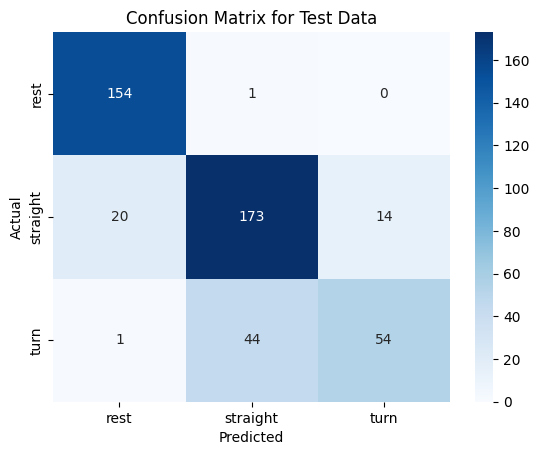

Classification Report for Test Data:
              precision    recall  f1-score   support

        rest       0.88      0.99      0.93       155
    straight       0.79      0.84      0.81       207
        turn       0.79      0.55      0.65        99

    accuracy                           0.83       461
   macro avg       0.82      0.79      0.80       461
weighted avg       0.82      0.83      0.82       461



In [26]:
# TODO - Display confusion matrix and print classification reports

#answer
# Predicting the test set labels
y_test_pred = grid.best_estimator_.predict(X_test)

# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Displaying the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.title("Confusion Matrix for Test Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Print the classification report
print("Classification Report for Test Data:")
print(classification_report(y_test, y_test_pred))

___

#### 2.1.4 - Question


1. Consider the differences between the performance on the training/cross-validation dataset for section 1 (1.2.3) and section 2 (2.1.3). Which model is a better fit based on *just these two evaluations*? (4 marks)

#### 2.1.4 Answer
The Section 1 model has a training score of 1.00, validation score of 0.95, and test score of 0.96. The perfect training score suggests overfitting, but its high validation and test scores indicate strong generalization.

The Section 2 model has a training score of 0.84, validation score of 0.82, and test score of 0.83. The smaller gap between scores shows better generalization.

Section 1’s model is better because of its higher validation (0.95) and test scores (0.96), despite the risk of overfitting


___

### 2.2 - Model Evaluation on Test Datasets 1 and 2 (7 Marks)

___

#### 2.2.1 - Extract selected features and targets from test datasets

The model trained in 2.1 is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into the selected features and target vectors *(X1, y1)* and (X2,)

In [27]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1
# (1 marks)
y1 = test_set1['motion_state']
X1 = test_set1[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]
X1.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000001,7.749919e-08,9.786930,9.801661,7.727190e-10
1,0.000001,9.243000e-08,9.788127,9.802481,8.871433e-10


In [28]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]
X2.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000002,3.020959e-07,9.791451,9.800683,1.405038e-09
1,0.000003,6.859937e-07,9.785619,9.797741,1.164381e-09


___

#### 2.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [29]:
# TODO - Print test score accuracies for test_set1 and test_set2

#answer
test_set1_score = grid.best_estimator_.score(X1, y1)
test_set2_score = grid.best_estimator_.score(X2, y2)

print("test_set1 score: {:.2f}".format(test_set1_score))
print("test_set2 score: {:.2f}".format(test_set2_score))

test_set1 score: 0.83
test_set2 score: 0.84


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

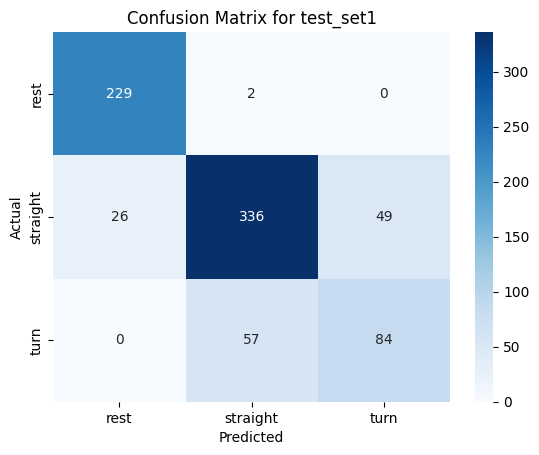

Classification Report for test_set1:
              precision    recall  f1-score   support

        rest       0.90      0.99      0.94       231
    straight       0.85      0.82      0.83       411
        turn       0.63      0.60      0.61       141

    accuracy                           0.83       783
   macro avg       0.79      0.80      0.80       783
weighted avg       0.83      0.83      0.83       783



In [30]:
# TODO - Display confusion matrix and print classification report for (X1, y1)

#answer
y1_pred = grid.best_estimator_.predict(X1)  # Predicting on test_set1

conf_matrix_1 = confusion_matrix(y1, y1_pred)
sns.heatmap(conf_matrix_1, annot=True, fmt="d", cmap="Blues", xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.title("Confusion Matrix for test_set1")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("Classification Report for test_set1:")
print(classification_report(y1, y1_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

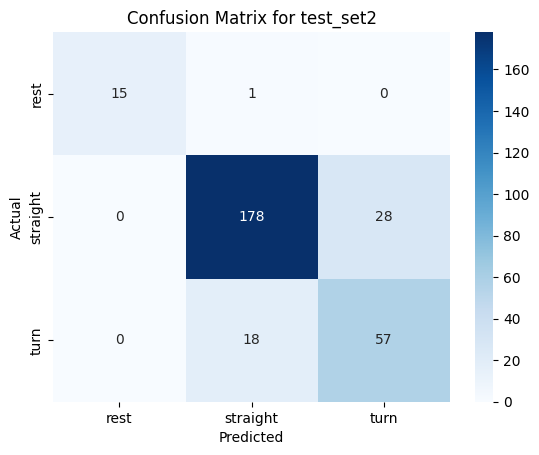

Classification Report for test_set2:
              precision    recall  f1-score   support

        rest       1.00      0.94      0.97        16
    straight       0.90      0.86      0.88       206
        turn       0.67      0.76      0.71        75

    accuracy                           0.84       297
   macro avg       0.86      0.85      0.85       297
weighted avg       0.85      0.84      0.84       297



In [31]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

#answer
y2_pred = grid.best_estimator_.predict(X2)  # Predicting on test_set2

conf_matrix_2 = confusion_matrix(y2, y2_pred)
sns.heatmap(conf_matrix_2, annot=True, fmt="d", cmap="Blues", xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.title("Confusion Matrix for test_set2")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("Classification Report for test_set2:")
print(classification_report(y2, y2_pred))

___

#### 2.2.3 Questions

1. For section 2, compare between the model's performance on the training/validation (2.1) set to the the performance on the two testing sets (2.2). How does the model fit? (3 marks)
1. Compare the models' performances and fits between section 1 and section 2, and consider all three datasets. (3 marks)

#### 2.2.3 Answers
1. The model generalizes well to both test sets, even though its performance on the first test set is slightly lower than the first implementation. Notably, it achieved 83% accuracy on the test set with the same distribution.  

2. The model from Section 1 achieved a 0.96 accuracy on the test set with the same distribution, 0.92 on *test_set1*, and 0.25 on *test_set2*, resulting in an average generalization score of 0.585. In contrast, the model from Section 2 achieved 0.83 accuracy on the test set with the same distribution, 0.83 on *test_set1*, and 0.84 on *test_set2*, giving an average generalization score of 0.835. Since the goal is to maximize generalization, the model from Section 2 is better. However, if the goal were to optimize for *test_set1* and the same distribution, the conclusion would differ.

____

## Section 3 - Classification Using *Group Selected Features* From Inertial Sensor Data (10 Marks)

Once again, an *SVC* model is to be trained and tuned using grid search. However, you must select which features to use from the ones provided in *cv_set*.  

____

### 3.1 Grid Search with Cross Validation (4 Marks)

___

#### 3.1.1 Extract *Group Selected* features and target from *cv_set*

**Question**
1. Please list the features that you have selected and explain *why you have chosen* these features? (4 marks)


1. The features ax_var, ay_var, and az_var measure how much acceleration varies in the x, y, and z directions. These variations can show changes in motion, like starting to move, stopping, or changing direction.  

The feature a_sum is the total acceleration magnitude, calculated using the formula sqrt(ax² + ay² + az²). This gives a combined measure of movement strength. Higher values mean active movement, while lower values suggest the object is either at rest or moving steadily.  

The features gx_var, gy_var, and gz_var measure how much the gyroscope readings vary in the x, y, and z directions. These variations help detect rotational movements, like turning or spinning.  

These features are directly related to motion and changes in movement. They combine information about straight-line movement (from the accelerometer) and rotational movement (from the gyroscope). Variance shows changes in motion, while sums and magnitudes capture overall movement intensity, making these features useful for identifying different types of motion.

In [32]:
# TODO - Load group selected features from cv_set to X
X = cv_set[['ax_var', 'ay_var', 'az_var', 'a_sum', 'gx_var', 'gy_var', 'gz_var']]
X.head(2)

,ax_var,ay_var,az_var,a_sum,gx_var,gy_var,gz_var
0,8.046094e-07,1.319665e-07,3.267073e-08,9.797418,2.365611e-09,6.964705e-10,7.446916e-10
1,1.032619e-06,1.073067e-07,1.529967e-08,9.798815,2.242613e-09,6.533136e-10,6.983481e-10


In [33]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']
y.head(2)

,motion_state
0,rest
1,rest


___

#### 3.1.2 - Configure and Perform Grid Search with Cross-Validation

Follow the steps from **1.2.2** and perform model training and tuning using the group selected feature set.

In [34]:
# TODO - Perform model training and tuning using `GridSearchCV`

#answer
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42, stratify=y)

pipe = Pipeline([("scaler", StandardScaler()), ("svc", SVC())])

param_grid = {"svc__C":[0.01, 0.1, 1 ,10,100],
              "svc__gamma":[0.001, 0.01, 0.1,1],
              "svc__kernel":["rbf"],
              "scaler":[StandardScaler(), RobustScaler(), None]}

grid2 = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid2.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC())]),
             param_grid={'scaler': [StandardScaler(), RobustScaler(), None],
                         'svc__C': [0.01, 0.1, 1, 10, 100],
                         'svc__gamma': [0.001, 0.01, 0.1, 1],
                         'svc__kernel': ['rbf']},
             return_train_score=True, scoring='accuracy')

___

#### 3.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [35]:
# TODO: Print the results from the grid search

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(grid.cv_results_['mean_train_score'][grid.best_index_]))
print("Best cross-validation validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid2.score(X_test, y_test)))


Best params:
{'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf', 'scaler': RobustScaler()}

Best cross-validation train score: 0.84
Best cross-validation validation score: 0.82
Test-set score: 0.81


Display the confusion matrix and print the classification report for the trained model using the *test* split.

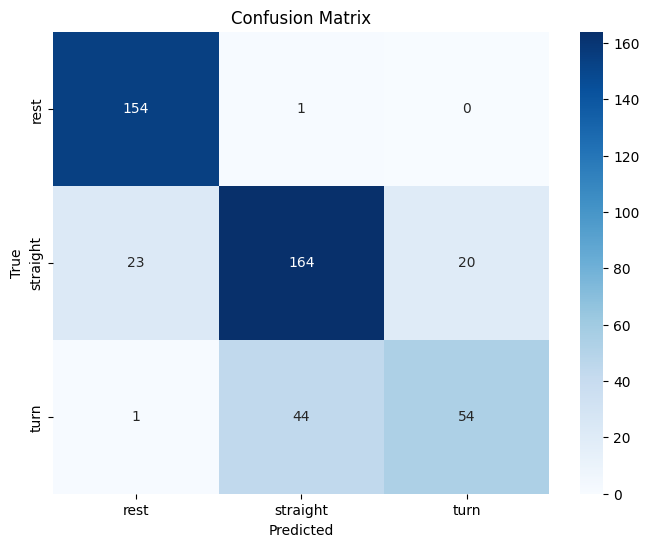

              precision    recall  f1-score   support

        rest       0.87      0.99      0.92       155
    straight       0.78      0.79      0.79       207
        turn       0.73      0.55      0.62        99

    accuracy                           0.81       461
   macro avg       0.79      0.78      0.78       461
weighted avg       0.80      0.81      0.80       461



In [36]:
# TODO - Display confusion matrix and print classification report
import numpy as np
y_pred = grid2.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, y_pred))

___

### 3.2 - Model Evaluation on Test Datasets 1 and 2 (6 Marks)

___

#### 3.2.1 - Extract group selected features and targets from test datasets

The model trained in 3.1 is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into group selected features and target vectors *(X1, y1)* and *(X2,y2)*

In [37]:
# TODO - Load the target vector from test_set1 into y1, and the group selected features from test_set1 into X1
y1 = test_set1['motion_state']
X1 = test_set1[['ax_var', 'ay_var', 'az_var', 'a_sum', 'gx_var', 'gy_var', 'gz_var']]
X1.head(2)

,ax_var,ay_var,az_var,a_sum,gx_var,gy_var,gz_var
0,0.000001,7.749919e-08,3.920063e-08,9.801661,3.655217e-09,6.507877e-10,7.727190e-10
1,0.000001,9.243000e-08,4.112300e-08,9.802481,3.349120e-09,6.788807e-10,8.871433e-10


In [38]:
# TODO - Load the target vector from test_set2 into y2, and the group selected features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2[['ax_var', 'ay_var', 'az_var', 'a_sum', 'gx_var', 'gy_var', 'gz_var']]
X2.head(2)

,ax_var,ay_var,az_var,a_sum,gx_var,gy_var,gz_var
0,0.000002,3.020959e-07,6.324738e-08,9.800683,1.718706e-09,1.211633e-09,1.405038e-09
1,0.000003,6.859937e-07,3.110085e-07,9.797741,2.179497e-09,1.893673e-09,1.164381e-09


___

#### 3.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [39]:
# TODO - Print test score accuracies for test_set1 and test_set2
y_pred_test1 = grid2.predict(X1)
test_score1 = accuracy_score(y1, y_pred_test1)
print("test_set1 score: {test_score:.2f}".format(test_score=test_score1))

y_pred_test2 = grid2.predict(X2)
test_score2 = accuracy_score(y2, y_pred_test2)
print("test_set2 score: {test_score:.2f}".format(test_score=test_score2))

test_set1 score: 0.79
test_set2 score: 0.61


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

Classification report:
              precision    recall  f1-score   support

        rest       0.92      0.85      0.88       231
    straight       0.78      0.84      0.81       411
        turn       0.62      0.57      0.59       141

    accuracy                           0.79       783
   macro avg       0.78      0.75      0.76       783
weighted avg       0.80      0.79      0.79       783


Confusion matrix:
[[196  35   0]
 [ 16 346  49]
 [  0  61  80]]


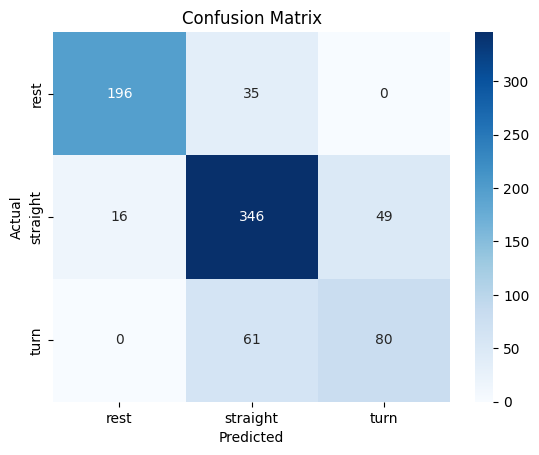

In [40]:
# TODO - Display confusion matrix and print classification report for (X1, y1)

from sklearn.metrics import classification_report, confusion_matrix

# Assuming y_test_red and y_pred_test_red are defined
print(f"Classification report:\n{classification_report(y1, y_pred_test1)}\n")
print(f"Confusion matrix:\n{confusion_matrix(y1, y_pred_test1)}")

conf_matrix_2 = confusion_matrix(y1, y_pred_test1)
sns.heatmap(conf_matrix_2, annot=True, fmt="d", cmap="Blues", xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

Classification report:
              precision    recall  f1-score   support

        rest       1.00      0.06      0.12        16
    straight       0.82      0.56      0.67       206
        turn       0.42      0.87      0.57        75

    accuracy                           0.61       297
   macro avg       0.75      0.50      0.45       297
weighted avg       0.73      0.61      0.61       297


Confusion matrix:
[[  1  15   0]
 [  0 116  90]
 [  0  10  65]]


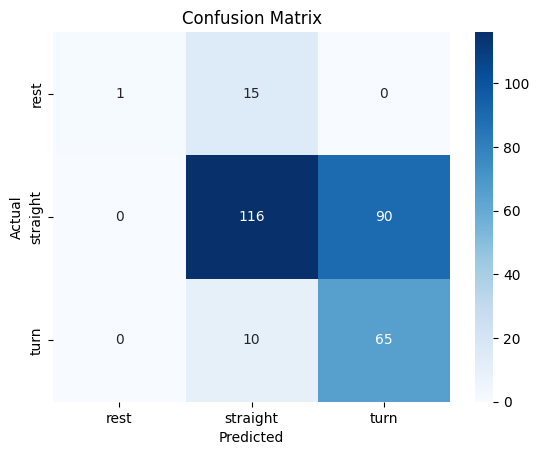

In [41]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

from sklearn.metrics import classification_report, confusion_matrix

# Assuming y_test_red and y_pred_test_red are defined
print(f"Classification report:\n{classification_report(y2, y_pred_test2)}\n")
print(f"Confusion matrix:\n{confusion_matrix(y2, y_pred_test2)}")

conf_matrix_2 = confusion_matrix(y2, y_pred_test2)
sns.heatmap(conf_matrix_2, annot=True, fmt="d", cmap="Blues", xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


___

#### 3.2.3 Questions

1. Based on the observations across all three datasets, compare the performance of the model trained in this section to: (3 marks)
    1. Model trained in Section 1 using *all features*.
    1. Model trained in Section 2 using *selected features*.

2. Please proivde potential explanations for the differences observed in models' performances across the three sections. (3 marks)

#### 3.2.3 Answers

1.
Section 1 (All Features):
This model performs well on the initial test set, but its results are inconsistent across other datasets. This inconsistency suggests it is overfitting, meaning it works well on the data it was trained on but struggles to generalize to new data.

Section 2 (Selected Features):
This model is more consistent across all datasets, even though its overall accuracy is slightly lower than Section 1. Its performance shows it generalizes better by sacrificing a bit of predictive accuracy for reliability.

Section 3 (Group-Selected Features):
This model’s performance depends on metrics like accuracy, precision, recall, and F1-score. While it’s more consistent than Section 1, its performance (0.79 and 0.61 on test sets) doesn’t surpass Section 2 (0.83 and 0.84). Section 3 shows promise but isn’t as robust or effective as Section 2.

Conclusion:
Section 2’s model is the best overall. It balances accuracy and consistency, with scores of 0.83 and 0.84 on test sets. Section 1 achieves a high score (0.92) on one test set but fails on another (0.25), proving it lacks generalization. Section 3 is consistent but doesn’t match Section 2’s accuracy and reliability. Section 2’s careful feature selection results in a model that performs better across different datasets.

2.Reasons for Performance Differences
Feature Selection:
The features chosen for training impact performance significantly. Section 1 uses all features, including unnecessary ones, leading to noise and overfitting. Section 2 focuses on fewer features, improving generalization but possibly missing some useful information. Section 3 picks features more carefully, striking a balance between the two.

Model Complexity:
Section 1’s model is complex because it uses all features, which can lead to overfitting. Sections 2 and 3 use simpler models, which tend to generalize better, especially when the selected features are meaningful.

Data Distribution:
The differences in how the training and test data are distributed affect model performance. If Section 1’s test set closely matches its training data, it explains why the model works well there but struggles on other datasets.

Overfitting vs. Underfitting:
Section 1 overfits by using all features, while Section 2 may slightly underfit by using fewer features. Section 3 strikes a balance, avoiding both extremes. Its consistent performance may also be due to better feature selection and tuning.

The differences across the sections highlight the importance of feature selection, model simplicity, and handling data distribution when building a model. Section 2 stands out because it avoids overfitting and generalizes well, making it the most reliable choice overall.

____

## Section 4 - Classification Using Principal Components of Features From Inertial Sensor Data (10 Marks)

____

### 4.1 Principal Component Analysis (PCA) Search with Cross Validation (4 Marks)

___

#### 4.1.1 Extract *ALL* features and target from *cv_set*

In [42]:
# TODO - Load all features from cv_set to X
X = cv_set.iloc[:, :32]
X.head(2)


,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391,9.797418,0.022554,8.046094e-07,1.319665e-07,...,0.023871,0.000003,0.001496,0.000544,0.024992,0.000110,0.000075,0.000078,0.024997,0.000187
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943,9.798815,0.021731,1.032619e-06,1.073067e-07,...,0.024153,0.000006,0.001865,0.000615,0.024828,0.000124,0.000098,0.000090,0.024829,0.000144


In [43]:
# TODO - Load motion_state column (target vector) into y
y = cv_set["motion_state"]
y.head(2)

,motion_state
0,rest
1,rest


___

#### 4.1.2 - Configure and Perform Grid Search with Cross-Validation

Similar to the steps from **1.2.2** and perform model training and tuning for an `SVC` model. Perform the `train_test_split`, initiate a `Pipeline`, then define the *Parameters* for `GridSearchCV`. Finally, perfrom the grid search.

In [44]:
# TODO - Perform model training and tuning using `GridSearchCV`
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1073, 32), (461, 32), (1073,), (461,))

In the `Pipeline` add an entry *'pca'* to apply `PCA`.

In [45]:
# Perform any missing imports

# TODO - Initiate the pipeline
# (1 marks)
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('pca', PCA()), ('svc', SVC())])

Similar to previous sections, define the grid search configuration (*param_grid*). Add *n_components* hyper parameter tuning for PCA, and search over the values `n_components=[4,7,11,14,16]`.  

In [46]:
# TODO - Define the parameter grid for your model
# (3 marks)
param_grid = [{'scaler': [StandardScaler(), RobustScaler(), None],
    'pca__n_components': [4,7,11,14,16],
    'svc__C': [0.1, 1, 10, 100],
    'svc__kernel': ['rbf'],
    'svc__gamma': [0.001, 0.01, 0.1, 1]
}]




In [47]:
# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()), ('svc', SVC())]),
             param_grid=[{'pca__n_components': [4, 7, 11, 14, 16],
                          'scaler': [StandardScaler(), RobustScaler(), None],
                          'svc__C': [0.1, 1, 10, 100],
                          'svc__gamma': [0.001, 0.01, 0.1, 1],
                          'svc__kernel': ['rbf']}],
             return_train_score=True, scoring='accuracy')

___

#### 4.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [48]:
print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(grid.cv_results_['mean_train_score'][grid.best_index_]))
print("Best cross-validation validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Best params:
{'pca__n_components': 14, 'scaler': RobustScaler(), 'svc__C': 100, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}

Best cross-validation train score: 0.97
Best cross-validation validation score: 0.94
Test-set score: 0.96


Display the confusion matrix and print the classification report for the trained model using the *test* split.

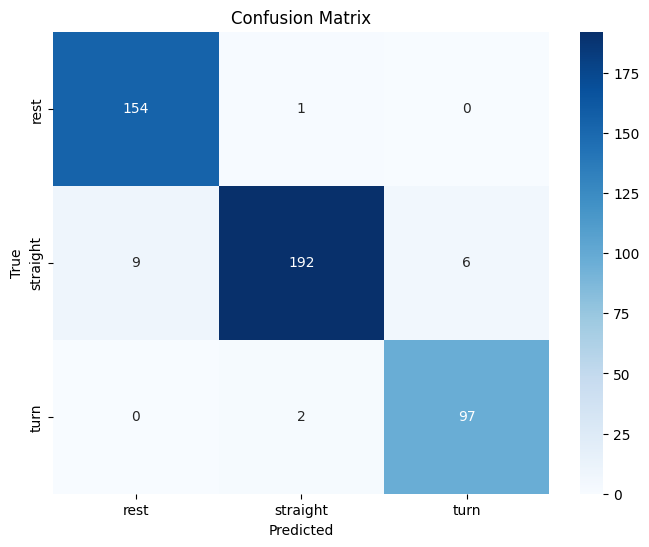

              precision    recall  f1-score   support

        rest       0.94      0.99      0.97       155
    straight       0.98      0.93      0.96       207
        turn       0.94      0.98      0.96        99

    accuracy                           0.96       461
   macro avg       0.96      0.97      0.96       461
weighted avg       0.96      0.96      0.96       461



In [49]:
# TODO - Display confusion matrix and print classification report
y_pred = grid.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, y_pred))

___

### 4.2 - Model Evaluation on Test Datasets 1 and 2 (6 Marks)

___

#### 4.2.1 - Extract group selected features and targets from test datasets

In [50]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1
y1 = test_set1["motion_state"]
X1 = test_set1.iloc[:, :32]
X1.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,0.264465,0.089904,9.786930,-0.002305,0.000218,-0.001143,9.801661,0.025634,0.000001,7.749919e-08,...,0.024056,0.000003,0.002506,0.000845,0.024884,0.000155,0.000078,0.000069,0.024886,0.000170
1,0.264300,0.088882,9.788127,-0.001865,-0.000523,-0.001999,9.802481,0.025218,0.000001,9.243000e-08,...,0.024084,0.000007,0.002427,0.000949,0.024881,0.000201,0.000095,0.000076,0.024883,0.000201


In [51]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2
y2 = test_set2["motion_state"]
X2 = test_set2.iloc[:, :32]
X2.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.046400,0.305907,9.791451,-0.002184,0.001311,-0.001901,9.800683,0.012437,0.000002,3.020959e-07,...,0.048406,0.000007,0.002575,0.002993,0.049701,0.000094,0.000115,0.000080,0.049764,0.000142
1,-0.050073,0.311947,9.785619,-0.003369,0.001898,-0.002051,9.797741,0.013805,0.000003,6.859937e-07,...,0.047696,0.000013,0.003880,0.004106,0.050477,0.000140,0.000140,0.000083,0.050763,0.000151


___

#### 4.2.2 - Visualize Results

In [52]:
# TODO - Print test score accuracies for test_set1 and test_set2
print("test_set1 score: {:.2f}".format(grid.score(X1, y1)))
print("test_set2 score: {:.2f}".format(grid.score(X2, y2)))

test_set1 score: 0.93
test_set2 score: 0.67


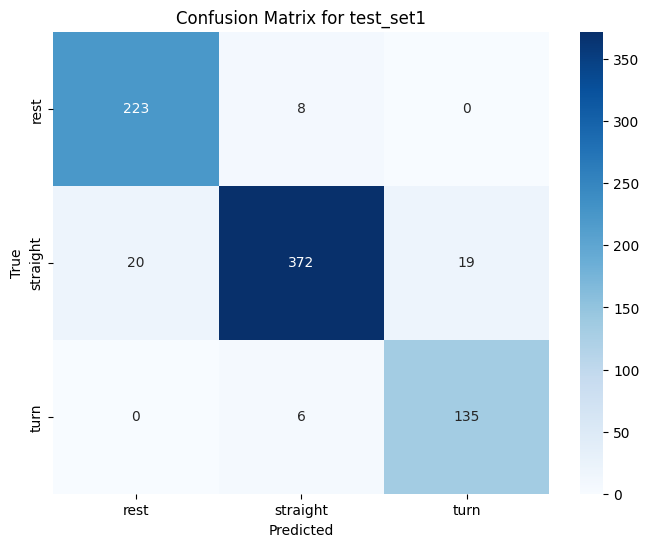

              precision    recall  f1-score   support

        rest       0.92      0.97      0.94       231
    straight       0.96      0.91      0.93       411
        turn       0.88      0.96      0.92       141

    accuracy                           0.93       783
   macro avg       0.92      0.94      0.93       783
weighted avg       0.93      0.93      0.93       783



In [53]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
y1_pred = grid.predict(X1)
conf_mat1 = confusion_matrix(y1, y1_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat1, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y1), yticklabels=np.unique(y1))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for test_set1")
plt.show()

print(classification_report(y1, y1_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

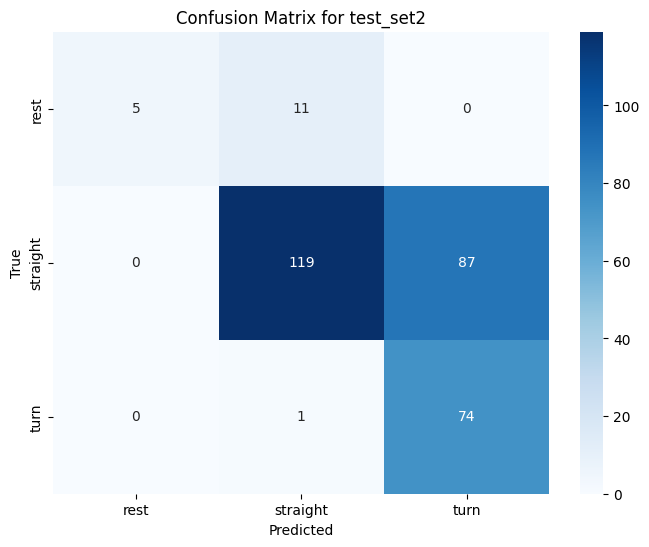

              precision    recall  f1-score   support

        rest       1.00      0.31      0.48        16
    straight       0.91      0.58      0.71       206
        turn       0.46      0.99      0.63        75

    accuracy                           0.67       297
   macro avg       0.79      0.63      0.60       297
weighted avg       0.80      0.67      0.67       297



In [54]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

y2_pred = grid.predict(X2)
conf_mat2 = confusion_matrix(y2, y2_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat2, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y2), yticklabels=np.unique(y2))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for test_set2")
plt.show()

print(classification_report(y2, y2_pred))

___

#### 4.2.3 - Questions

1. Based on the observations across all three datasets, compare the performance of the model with PCA, trained in this section to: (4 marks)
    * Model trained in Section 1 using *all features*.
    * Model trained in Section 2 using *selected features*.
    * Model trained in Section 3 using *group selected features*

2. Please provide potential explanations for the differences observed in models' performances across between section 1 and 4. (2 marks)

#### 4.2.3 - Answers
### Simplified Explanation  

#### 1. Comparison of Models  

Section 1 (All Features):  
This model used all the features, which made it very accurate during training. However, it didn’t perform well on new data because it also learned unnecessary or noisy details, causing overfitting.  

Section 2 (Selected Features):  
By using only a few important features, this model gave up some accuracy to become more consistent and reliable. Removing noise and redundant data helped it perform better on new datasets compared to Section 1.  

Section 3 (Group Selected Features):  
This model used a carefully chosen set of features based on expert knowledge or importance scores. It is expected to generalize better than Section 1 and may have higher accuracy than Section 2 because its features were selected more thoughtfully.  

Section 4 (PCA):
This model used Principal Component Analysis (PCA) to simplify the data by keeping only the most important patterns. PCA reduced the complexity of the data, avoiding overfitting like in Section 1, and helped the model generalize better while retaining critical information.  

 2. Key Differences Between Sections 1 and 4  

Overfitting Control:
In Section 1, using all features made the model memorize unnecessary details, leading to poor performance on new data. In Section 4, PCA focused only on the most important patterns, helping the model handle new datasets more effectively.  

Simplifying the Data:
Section 1’s model became too complicated by using all features, which made it less efficient. Section 4 used PCA to reduce the number of features while keeping the key information, making the model simpler, more reliable, and better at generalizing.  

____

## Section 5 - Classification Using *Pre Selected Features* Derived From Inertial Sensor Data (10 Marks)

___

Now, a second classifer is to be trained and tuned using grid search. The **selected features from section 2** must be used. You may choose from one of the algorithms discussed that class listed below.
1. Random Forest
1. K-Nearest Neighbors
1. Gradient Boosting Machines
1. Neural Networks

____

### 5.1 Grid Search with Cross Validation (6 Marks)

___

#### 5.1.1 Extract *Selected* features and target from *cv_set*

**Questions**
1. Please list the ML model that you have selected . And explain *why you have chosen* this model? (2 marks)

Answer

Because the **Random Forest** model can accurately complete classification tasks, we chose it. It is a potent addition to decision trees that divides data according to the most advantageous attribute. RFs can assess the significance of different attributes and work well with larger, high-dimensional datasets. It uses a bagging/aggregation technique to randomly select the subset of data utilized for training. A random subset of features is chosen for every node split in a tree. Performance and randomness are improved as a result. Every tree also adds a vote at random to the final classification.

**Answer**
1.

In [55]:
# TODO - Load group selected features from cv_set to X
X = cv_set[["ax_var", "ay_var", "az_sum", "a_sum", "gz_var"]]
X.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,8.046094e-07,1.319665e-07,9.789349,9.797418,7.446916e-10
1,1.032619e-06,1.073067e-07,9.789095,9.798815,6.983481e-10


In [56]:
# TODO - Load motion_state column (target vector) into y
y = cv_set["motion_state"]
y.head(2)

,motion_state
0,rest
1,rest


___

#### 5.1.2 - Configure and Perform Grid Search with Cross-Validation

Similar to the steps from **1.2.2** and perform model training and tuning using for the model selected. Perform the `train_test_split`, initiate a `Pipeline`, then define the *Parameters* for `GridSearchCV`. Finally, perfrom the grid search.

In [57]:
# TODO - Perform train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42, stratify=y)

In [59]:
# Perform any missing imports
from sklearn.ensemble import RandomForestClassifier

# TODO - Initiate the pipeline
# (1 mark)
pipe = Pipeline([("scaler", StandardScaler()), ("rf", RandomForestClassifier())])

In [60]:
# TODO - Define the parameter grid for your model
# (3 marks)
param_grid = {"rf__n_estimators":[10, 100],
              "rf__criterion":["gini", "entropy", "log_loss"],
              "rf__max_depth": [10, 20],
              "rf__max_leaf_nodes": [10, 20],
              "rf__max_features": ["sqrt", "log2", None],
              "rf__bootstrap": [True],
              "scaler":[StandardScaler(), RobustScaler(), MinMaxScaler(), Normalizer(), None]}

In [61]:
# TODO - Perform the grid search
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'rf__bootstrap': [True],
                         'rf__criterion': ['gini', 'entropy', 'log_loss'],
                         'rf__max_depth': [10, 20],
                         'rf__max_features': ['sqrt', 'log2', None],
                         'rf__max_leaf_nodes': [10, 20],
                         'rf__n_estimators': [10, 100],
                         'scaler': [StandardScaler(), RobustScaler(),
                                    MinMaxScaler(), Normalizer(), None]},
             return_train_score=True, scoring='accuracy')

___

#### 5.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [62]:
# TODO: Print the results from the grid search

resultlist = sorted(grid.cv_results_.keys())
print(resultlist)
print()
best_param =  grid.cv_results_["params"][grid.best_index_]
print("Best params:\n{best_param}\n".format(best_param=best_param))
train_scores = [max(grid.cv_results_["split0_train_score"]),
                max(grid.cv_results_["split1_train_score"]),
                max(grid.cv_results_["split2_train_score"]),
                max(grid.cv_results_["split3_train_score"]),
                max(grid.cv_results_["split4_train_score"]),
                ]
best_train_score = max(train_scores)
print("Best cross-validation train score: {best_train_score:.2f}".format(best_train_score=best_train_score))
valid_scores = [max(grid.cv_results_["split0_test_score"]),
                max(grid.cv_results_["split1_test_score"]),
                max(grid.cv_results_["split2_test_score"]),
                max(grid.cv_results_["split3_test_score"]),
                max(grid.cv_results_["split4_test_score"]),
                ]
best_valid_score = max(valid_scores)
print("Best cross-validation validation score: {best_valid_score:.2f}".format(best_valid_score=best_valid_score))

from sklearn.metrics import accuracy_score
y_pred_test = grid.predict(X_test)
test_score = accuracy_score(y_test, y_pred_test)
print("Test-set score: {test_score:.2f}".format(test_score=test_score))

['mean_fit_time', 'mean_score_time', 'mean_test_score', 'mean_train_score', 'param_rf__bootstrap', 'param_rf__criterion', 'param_rf__max_depth', 'param_rf__max_features', 'param_rf__max_leaf_nodes', 'param_rf__n_estimators', 'param_scaler', 'params', 'rank_test_score', 'split0_test_score', 'split0_train_score', 'split1_test_score', 'split1_train_score', 'split2_test_score', 'split2_train_score', 'split3_test_score', 'split3_train_score', 'split4_test_score', 'split4_train_score', 'std_fit_time', 'std_score_time', 'std_test_score', 'std_train_score']

Best params:
{'rf__bootstrap': True, 'rf__criterion': 'log_loss', 'rf__max_depth': 10, 'rf__max_features': None, 'rf__max_leaf_nodes': 20, 'rf__n_estimators': 100, 'scaler': StandardScaler()}

Best cross-validation train score: 0.92
Best cross-validation validation score: 0.89
Test-set score: 0.85


Display the confusion matrix and print the classification report for the trained model using the *test* split.

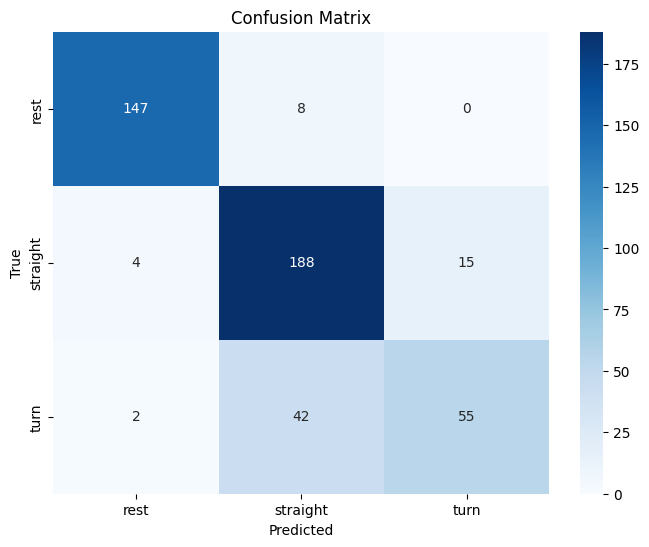

              precision    recall  f1-score   support

        rest       0.96      0.95      0.95       155
    straight       0.79      0.91      0.84       207
        turn       0.79      0.56      0.65        99

    accuracy                           0.85       461
   macro avg       0.85      0.80      0.82       461
weighted avg       0.85      0.85      0.84       461



In [63]:
# TODO - Display confusion matrix and print classification report

y_pred = grid.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, y_pred))


___

### 5.2 - Model Evaluation on Test Datasets 1 and 2 (4 Marks)

___

#### 5.2.1 - Extract selected features and targets from test datasets

The model trained in 5.1, is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into features and target vectors *(X1, y1)* and *(X2,y2)*

In [78]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1
y1 = test_set1["motion_state"]
X1 = test_set1[["ax_var", "ay_var", "az_sum", "a_sum", "gz_var"]]
X1.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000001,7.749919e-08,9.786930,9.801661,7.727190e-10
1,0.000001,9.243000e-08,9.788127,9.802481,8.871433e-10


In [79]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2[["ax_var", "ay_var", "az_sum", "a_sum", "gz_var"]]
X2.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000002,3.020959e-07,9.791451,9.800683,1.405038e-09
1,0.000003,6.859937e-07,9.785619,9.797741,1.164381e-09


___

#### 5.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [80]:
# TODO - Print test score accuracies for test_set1 and test_set2
y_pred_test1 = grid.predict(X1)
test_score1 = accuracy_score(y1, y_pred_test1)
print("test_set1 score: {test_score:.2f}".format(test_score=test_score1))

y_pred_test2 = grid.predict(X2)
test_score2 = accuracy_score(y2, y_pred_test2)
print("test_set2 score: {test_score:.2f}".format(test_score=test_score2))

test_set1 score: 0.86
test_set2 score: 0.76


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

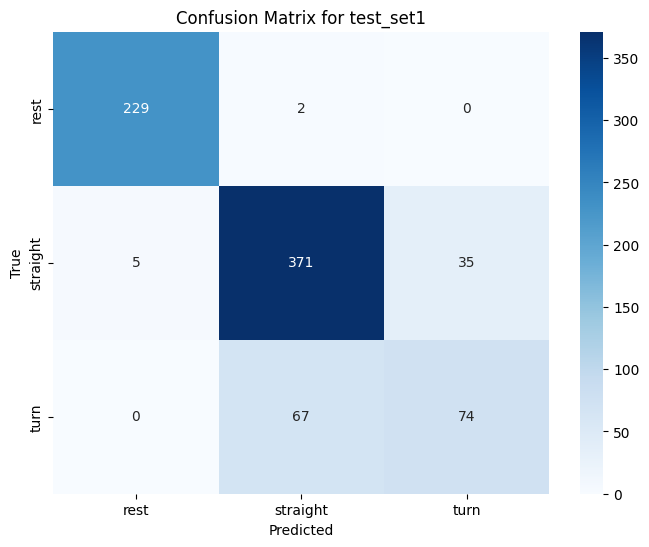

              precision    recall  f1-score   support

        rest       0.98      0.99      0.98       231
    straight       0.84      0.90      0.87       411
        turn       0.68      0.52      0.59       141

    accuracy                           0.86       783
   macro avg       0.83      0.81      0.82       783
weighted avg       0.85      0.86      0.85       783



In [81]:
# TODO - Display confusion matrix and print classification report for (X1, y1)

y1_pred = grid.predict(X1)
conf_mat1 = confusion_matrix(y1, y1_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat1, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y1), yticklabels=np.unique(y1))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for test_set1")
plt.show()

print(classification_report(y1, y1_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

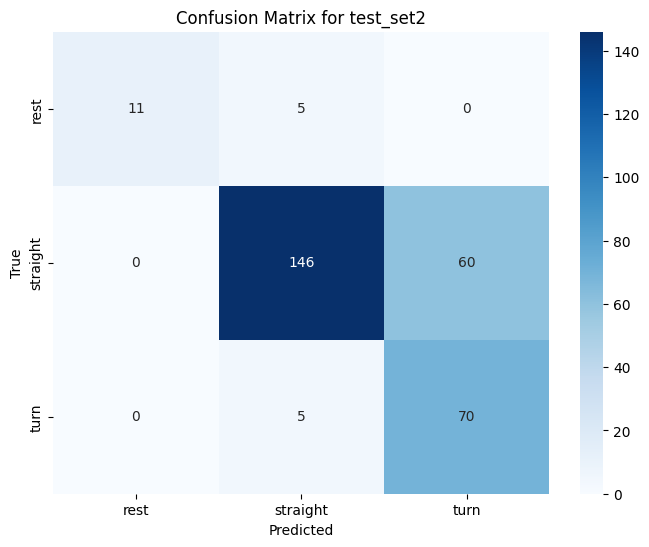

              precision    recall  f1-score   support

        rest       1.00      0.69      0.81        16
    straight       0.94      0.71      0.81       206
        turn       0.54      0.93      0.68        75

    accuracy                           0.76       297
   macro avg       0.82      0.78      0.77       297
weighted avg       0.84      0.76      0.78       297



In [82]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

y2_pred = grid.predict(X2)
conf_mat2 = confusion_matrix(y2, y2_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat2, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y2), yticklabels=np.unique(y2))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for test_set2")
plt.show()

print(classification_report(y2, y2_pred))

___

#### 5.2.3 Question

1. For the model trainied in this section, compare its performance to the performance of SVC which was also trained with the same selected features (section 2). Which model fits better? Explain causes for any observed discrepancies? (4 marks)

#### 5.2.3 - Answer
1. Since there is just a minor difference in performance between the two test sets (0.83 vs. 0.84), the SVC model in section 2 fits better. The Random Forest model, on the other hand, performs noticeably worse on Test Set 2 (0.72), indicating that it might not generalize as well to unknown data.
Below is a list of the reasons why there are differences:

Using Random Forest to overfit:
It's possible that Random Forest overfits to Test Set 1 patterns, which would result in subpar generalization on Test Set 2. This might occur if the forest's trees were excessively deep, which would force the model to commit some training data information to memory.

Disparity in Test Set Characteristics: Test Set 2 may differ slightly from the training set in terms of noise levels or feature distributions. SVC manages this better than Random Forest since it is less susceptible to noise in feature importance.

Sensitivity to Feature relevance: Random Forest builds splits based on feature relevance. The performance difference may increase if some features are very instructive for Test Set 1 but not for Test Set 2. This implies that the feature distributions of the two test sets may differ from one another.

SVC's Generalization:
Finding the decision boundary separating the data points is the main goal of SVC, a margin-based classifier. Because it is less prone to overfit to particular patterns in the training data, this method may generalize better when feature distributions vary somewhat between test sets.

Model Complexity:
Random Forest may need additional tuning (e.g., lowering tree depth or number of trees), but SVC's ability to sustain performance over various test sets indicates that its model complexity is well-tuned for the data.






____